In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US= df[df['job_country']=='United States']


In [ ]:
df_skills= df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

df_skills_count= df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count= df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [15]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles= sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plotting 

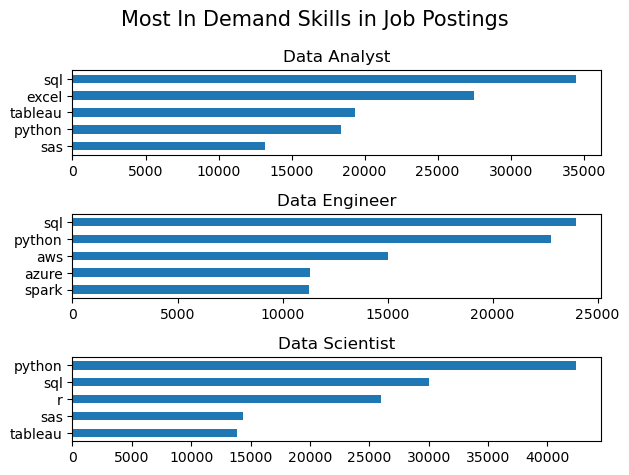

In [21]:
fig, ax= plt.subplots(len(job_titles), 1 )

for i, job_title in enumerate(job_titles):
    df_plot= df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax= ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("Most In Demand Skills in Job Postings", fontsize=15)
fig.tight_layout()
plt.show()


In [23]:
df_job_title_total= df_US['job_title_short'].value_counts().reset_index(name='job_total')

In [29]:
df_skills_perct= pd.merge(df_skills_count, df_job_title_total, how='left', on='job_title_short')

df_skills_perct['skill_percent']= (df_skills_perct['skill_count'] / df_skills_perct['job_total']) * 100
df_skills_perct

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


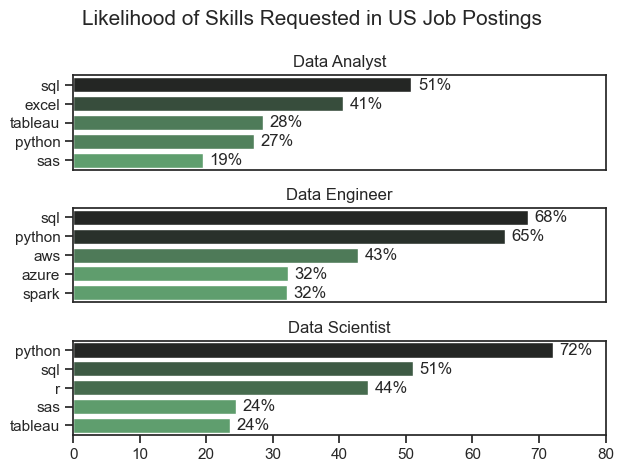

In [50]:
fig, ax= plt.subplots(len(job_titles), 1 )

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot= df_skills_perct[df_skills_perct['job_title_short']==job_title].head()
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:g_r' )
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,80)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1,n, f'{v:.0f}%' , va= 'center')
        
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])


fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
fig.tight_layout()
plt.show()
